In [2]:
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import time
import pandas as pd

# 初始化 Edge 浏览器驱动
driver = webdriver.Edge()

# 打开网页
url = 'https://esf.fang.com/house-a015277-b022/i31/'
driver.get(url)

data_list = []
page_count = 20

for _ in range(page_count):
    try:
        WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.CSS_SELECTOR, 'dd.price_right'))
        )

        price_elements = driver.find_elements(By.CSS_SELECTOR, 'dd.price_right')

        for price_element in price_elements:
            try:
                total_price_element = price_element.find_element(By.CSS_SELECTOR, 'span.red b')
                total_price = total_price_element.text
                unit_price_element = price_element.find_element(By.XPATH, './span[2]')
                unit_price = unit_price_element.text.replace('元/㎡', '')

                data_list.append({
                    '总价': total_price,
                    '单价': unit_price
                })
            except:
                print('某个房源信息获取失败')

        try:
            # 修改翻页定位
            next_page_button = WebDriverWait(driver, 10).until(
                EC.element_to_be_clickable((By.CSS_SELECTOR, 'p.last a'))
            )
            next_page_button.click()
            time.sleep(5)
        except:
            print("未找到翻页元素，或已到达最后一页")
            break

    except Exception as e:
        print(f"发生错误: {e}")
        break

df = pd.DataFrame(data_list)
excel_path = r"C:\桌面文件下载在这里\HW3\data.xlsx"
df.to_excel(excel_path, index=False)
print(df)
driver.quit()

        总价      单价
0      946  127837
1      710   81403
2      760  155419
3     1010  123623
4     1150   69015
...    ...     ...
1195  1250  128021
1196   430   68690
1197  1150  105215
1198   820   75869
1199   938  134383

[1200 rows x 2 columns]


In [3]:
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import time
import pandas as pd

# 初始化 Edge 浏览器驱动
driver = webdriver.Edge()

# 打开网页
url = 'https://zu.fang.com/house-a015277-b022/'
driver.get(url)

data_list = []
page_count = 6  # 设置翻页次数

try:
    for _ in range(page_count):
        # 等待页面加载完成
        WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.CSS_SELECTOR, 'p.font15.mt12.bold'))
        )

        # 获取所有匹配的元素
        elements = driver.find_elements(By.CSS_SELECTOR, 'p.font15.mt12.bold')

        for element in elements:
            # 获取元素的文本内容
            text = element.text

            # 使用分隔符分割文本
            parts = text.split('|')

            # 去除空格和换行符
            cleaned_parts = [part.strip() for part in parts]

            # 定位当前房子的月租价格
            try:
                parent = element.find_element(By.XPATH, 'ancestor::dd')
                price_element = parent.find_element(By.CSS_SELECTOR, 'div.moreInfo p.mt5.alingC span.price')
                monthly_rent = price_element.text
            except:
                monthly_rent = "价格未找到"

            # 将数据添加到列表
            cleaned_parts.append(monthly_rent)
            data_list.append(cleaned_parts)

        # 尝试翻页
        try:
            # 使用 XPath 定位“下一页”按钮
            next_page_button = WebDriverWait(driver, 10).until(
                EC.element_to_be_clickable((By.XPATH, "//div[@class='fanye']/a[text()='下一页']"))
            )
            next_page_button.click()
            time.sleep(3)  # 等待页面加载
        except:
            print("未找到翻页元素，或已到达最后一页")
            break

except Exception as e:
    print(f"发生错误: {e}")

# 打印结果
for data in data_list:
    print(data)

df = pd.DataFrame(data_list)
excel_path = r"C:\桌面文件下载在这里\HW3\data2.xlsx"
df.to_excel(excel_path, index=False)

# 关闭浏览器驱动
driver.quit()

['合租次卧', '3户合租', '15㎡', '朝南', '2400']
['整租', '3室1厅', '65㎡', '朝南北', '3500']
['合租次卧', '3户合租', '10㎡', '朝南北', '1500']
['合租主卧', '2户合租', '20㎡', '朝南北', '2000']
['合租主卧', '2户合租', '20㎡', '朝东南', '2000']
['合租主卧', '2户合租', '15㎡', '朝南北', '1600']
['合租主卧', '3户合租', '21㎡', '朝东南', '2100']
['合租主卧', '2户合租', '20㎡', '朝南北', '2000']
['合租主卧', '2户合租', '18㎡', '朝南北', '1200']
['整租', '3室1厅', '68㎡', '朝南北', '2600']
['合租主卧', '2户合租', '20㎡', '朝东南', '2300']
['整租', '1室1厅', '69㎡', '朝西', '7500']
['整租', '3室1厅', '60㎡', '朝南北', '1100']
['整租', '1室1厅', '69㎡', '朝东', '8000']
['合租主卧', '2户合租', '15㎡', '朝南北', '2000']
['合租主卧', '4户合租', '25㎡', '朝南北', '1500']
['合租主卧', '2户合租', '20㎡', '朝东南', '2300']
['合租主卧', '4户合租', '20㎡', '朝南北', '2000']
['整租', '1室1厅', '48㎡', '朝南北', '5800']
['整租', '2室1厅', '59㎡', '朝南北', '6500']
['整租', '3室2厅', '139㎡', '朝南北', '19000']
['整租', '1室1厅', '45㎡', '朝东', '5800']
['整租', '1室1厅', '69㎡', '朝东', '8000']
['整租', '1室1厅', '44㎡', '朝南', '5600']
['整租', '3室2厅', '141㎡', '朝南北', '11600']
['整租', '4室2厅', '183㎡', '朝南北', '16800']
['整租', '3室1厅

<>:8: SyntaxWarning: invalid escape sequence '\H'
<>:8: SyntaxWarning: invalid escape sequence '\H'
C:\Users\pc\AppData\Local\Temp\ipykernel_8032\636645750.py:8: SyntaxWarning: invalid escape sequence '\H'
  excel_file = pd.ExcelFile("C:\桌面文件下载在这里\HW3\model.xlsx")
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-se

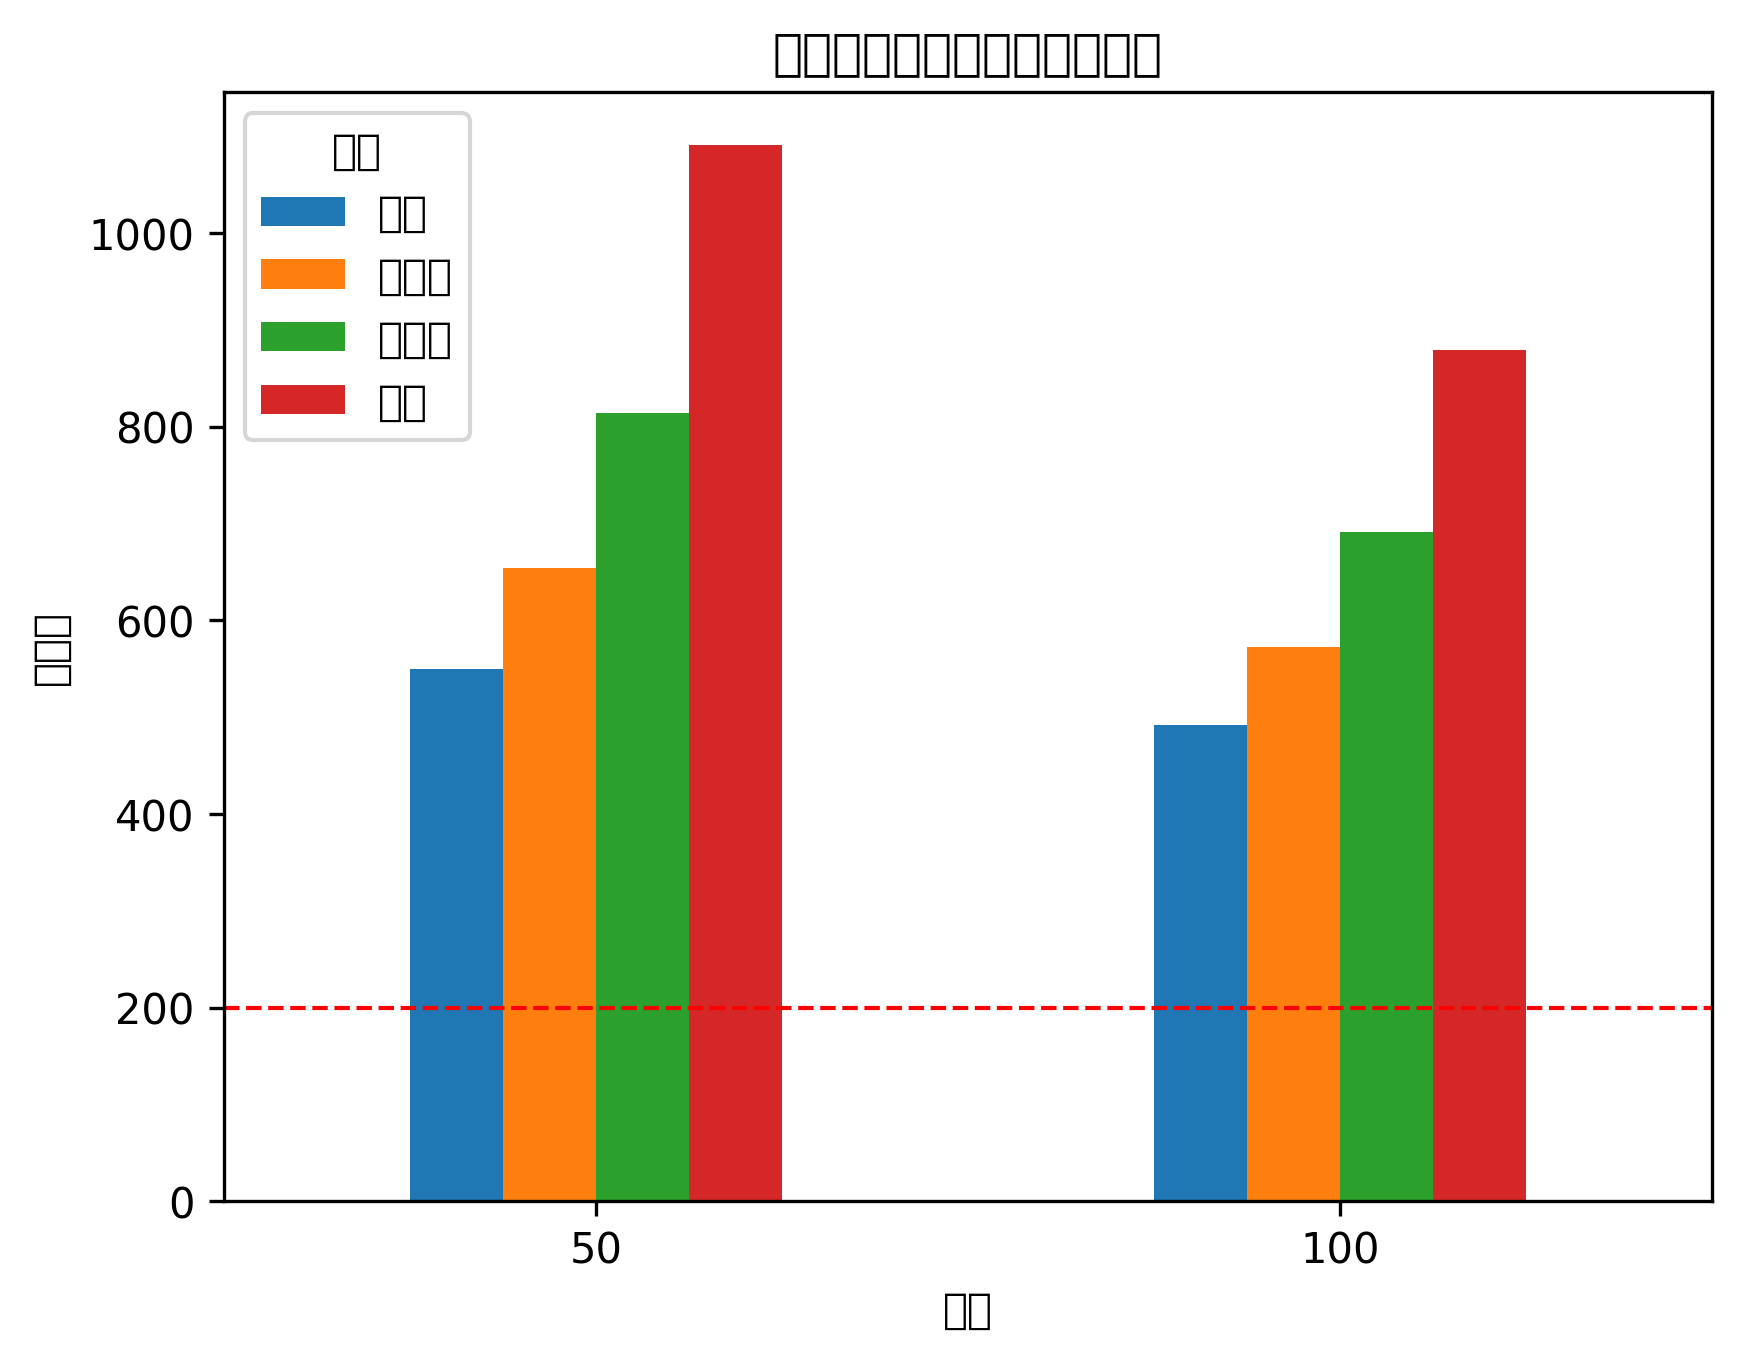

不同区域不同面积下的预测结果：
   区域编码   面积      二手房每平米价格      每平方米租金          租售比
0     1   50  99980.796186  182.004540   549.331332
1     1  100  99517.291973  202.486958   491.475070
2     2   50  98370.719555  150.408282   654.024621
3     2  100  97907.215342  170.890700   572.923015
4     3   50  96760.642924  118.812024   814.401097
5     3  100  96297.138711  139.294443   691.320750
6     4   50  95150.566293   87.215767  1090.978959
7     4  100  94687.062080  107.698185   879.189021


In [8]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt



# 读取文件
excel_file = pd.ExcelFile("C:\桌面文件下载在这里\HW3\model.xlsx")

# 获取二手房数据
house_sale = excel_file.parse('Sheet1')
# 重命名列名
house_sale.columns = ['二手房面积', '二手房每平米单价', '区域编码']

# 获取租房数据
house_rent = excel_file.parse('Sheet2')
# 重命名列名
house_rent.columns = ['面积', '总租金', '每平方米租金', '区域编码']

# 构建 Model 1 的自变量和因变量
X1 = sm.add_constant(house_sale[['二手房面积', '区域编码']])
y1 = house_sale['二手房每平米单价']

# 构建 Model 2 的自变量和因变量
X2 = sm.add_constant(house_rent[['面积', '区域编码']])
y2 = house_rent['每平方米租金']

# 拟合 Model 1
model1 = sm.OLS(y1, X1).fit()

# 拟合 Model 2
model2 = sm.OLS(y2, X2).fit()

# 准备预测数据
areas = [50, 100]
locations = house_sale['区域编码'].unique()

results = []
for location in locations:
    for area in areas:
        # 构建预测 Model 1 的数据
        X1_pred = pd.DataFrame({'const': [1], '二手房面积': [area], '区域编码': [location]})
        # 预测二手房每平米价格
        predicted_price = model1.predict(X1_pred)[0]

        # 构建预测 Model 2 的数据
        X2_pred = pd.DataFrame({'const': [1], '面积': [area], '区域编码': [location]})
        # 预测每平方米租金
        predicted_rent = model2.predict(X2_pred)[0]

        # 计算租售比
        price_rent_ratio = predicted_price / predicted_rent

        results.append({
            '区域编码': location,
            '面积': area,
            '二手房每平米价格': predicted_price,
            '每平方米租金': predicted_rent,
            '租售比': price_rent_ratio
        })

# 将结果转换为 DataFrame
results_df = pd.DataFrame(results)

# 设置图片清晰度
plt.rcParams['figure.dpi'] = 300

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['WenQuanYi Zen Hei']

# 绘制不同区域不同面积下租售比的柱状图
pivot_df = results_df.pivot(index='面积', columns='区域编码', values='租售比')
ax = pivot_df.plot(kind='bar')

# 添加区域名称映射
area_mapping = {1: '清河', 2: '西三旗', 3: '西二旗', 4: '上地'}
ax.legend(title='区域', labels=[area_mapping[code] for code in pivot_df.columns])

# 添加200的水平红线
ax.axhline(y=200, color='red', linestyle='--', linewidth=1)

plt.xlabel('面积')
plt.ylabel('租售比')
plt.title('不同区域不同面积下的租售比')
plt.xticks(rotation=0)

plt.show()

print("不同区域不同面积下的预测结果：")
print(results_df)

从图片可以看到，四个地区的租售比都远超200，其中在控制面积50平方米的情况下，最高的是上地地区，最低的是清河地区，同样的，在面积控制在100平方米时候，最高的仍然是上地地区。
因此，我们可以得出海淀区这四个地区的租售比都呈现远高于发达国家指标的结论。